In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Upload base de dados

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/acoes.csv')
df.head()

,Date,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,2015-01-02,16.020000,9.37,14.72,9.36,22.650000,47.259998
1,2015-01-05,15.730000,9.62,14.30,8.56,22.180000,46.320000
2,2015-01-06,16.330000,9.55,14.51,8.28,22.490000,46.580002
3,2015-01-07,16.559999,9.69,15.60,8.67,23.480000,48.150002
4,2015-01-08,16.540001,9.66,15.78,9.23,23.559999,48.509998


Importando bibliotecas

In [4]:
import numpy as np
import plotly.express as px

Retorno da carteira

In [6]:
#Normalização

dataset_normalizado = df.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

dataset_normalizado  

,Date,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.971467,0.914530,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.985734,0.884615,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,1.059783,0.926282,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.072011,0.986111,1.040177,1.026449
...,...,...,...,...,...,...,...
1915,2022-09-15,0.955056,0.995731,0.920516,3.318376,1.759382,2.245239
1916,2022-09-16,0.953184,0.971185,0.920516,3.288462,1.739514,2.234448
1917,2022-09-19,0.965668,0.985059,0.938179,3.340812,1.773951,2.289886
1918,2022-09-20,0.983770,1.002135,0.930706,3.321581,1.800883,2.303216


Visualização gráfica

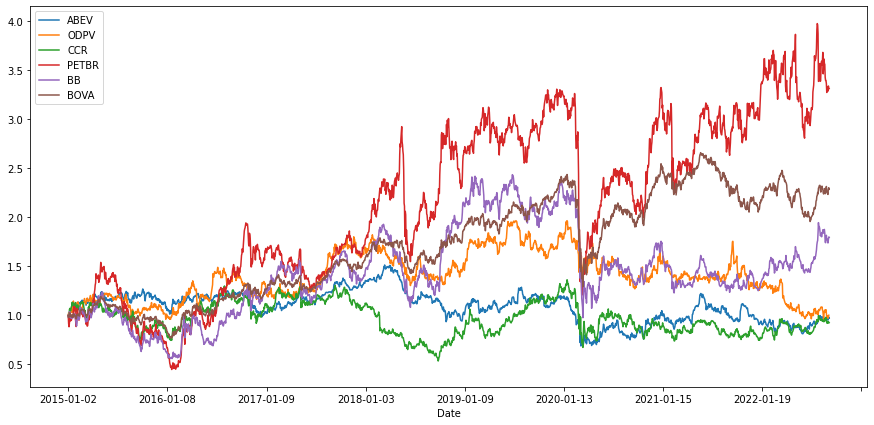

In [7]:
dataset_normalizado.plot(x = 'Date', figsize=(15, 7));

In [8]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [9]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.028533,-0.085470,-0.020751,-0.019890
2,0.038144,-0.007276,0.014685,-0.032710,0.013977,0.005613
3,0.014084,0.014660,0.075121,0.047101,0.044020,0.033705
4,-0.001208,-0.003096,0.011538,0.064590,0.003407,0.007477


Retorno anual

In [11]:
retorno_anual = (retorno_carteira.mean() * 246)*100
retorno_anual

ABEV      3.399386
ODPV      4.954457
CCR       7.264439
PETBR    28.420457
BB       17.017676
BOVA     13.920749
dtype: float64

In [13]:
pesos_carteira = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])

In [14]:
np.dot(retorno_anual, pesos_carteira)

15.853668354343409

O retorno da carteira no periodo considerado ficou ligeiramente acima do indice bovespa. (15.85% vs 13.92%)

In [17]:
dataset_normalizado = df.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])
dataset_normalizado.head()

,Date,ABEV,ODPV,CCR,PETBR,BB,BOVA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.971467,0.914530,0.979249,0.980110
2,2015-01-06,1.019351,1.019210,0.985734,0.884615,0.992936,0.985612
3,2015-01-07,1.033708,1.034152,1.059783,0.926282,1.036645,1.018832
4,2015-01-08,1.032459,1.030950,1.072011,0.986111,1.040177,1.026449


Analise grafica do retorno carteira vs ibovespa

In [18]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

Nota-se pelo grafico acima que o retorno de PETR4, ficou acima do indice ibovespa na quase totalidade do periodo considerado.

In [19]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['ABEV'] + dataset_normalizado['ODPV'] + dataset_normalizado['CCR'] + dataset_normalizado['PETBR'] + dataset_normalizado['BB']) / 5
dataset_normalizado

,Date,ABEV,ODPV,CCR,PETBR,BB,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.971467,0.914530,0.979249,0.980110,0.974765
2,2015-01-06,1.019351,1.019210,0.985734,0.884615,0.992936,0.985612,0.980369
3,2015-01-07,1.033708,1.034152,1.059783,0.926282,1.036645,1.018832,1.018114
4,2015-01-08,1.032459,1.030950,1.072011,0.986111,1.040177,1.026449,1.032342
...,...,...,...,...,...,...,...,...
1915,2022-09-15,0.955056,0.995731,0.920516,3.318376,1.759382,2.245239,1.589812
1916,2022-09-16,0.953184,0.971185,0.920516,3.288462,1.739514,2.234448,1.574572
1917,2022-09-19,0.965668,0.985059,0.938179,3.340812,1.773951,2.289886,1.600734
1918,2022-09-20,0.983770,1.002135,0.930706,3.321581,1.800883,2.303216,1.607815


In [20]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

In [21]:
dataset_normalizado.drop(['ABEV', 'ODPV', 'CCR', 'PETBR', 'BB'], axis = 1, inplace= True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000
1,2015-01-05,0.980110,0.974765
2,2015-01-06,0.985612,0.980369
3,2015-01-07,1.018832,1.018114
4,2015-01-08,1.026449,1.032342
...,...,...,...
1915,2022-09-15,2.245239,1.589812
1916,2022-09-16,2.234448,1.574572
1917,2022-09-19,2.289886,1.600734
1918,2022-09-20,2.303216,1.607815
